In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas_profiling import ProfileReport
import json
import pickle
import requests
from scipy.stats import pearsonr
from tqdm import tqdm
import scipy.stats as stats
from sklearn.impute import KNNImputer
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 55em; }</style>"))


### Loading in combined data set that has been run through 'cleaning-catagorical-data' file

In [7]:
df = pd.read_csv('../data/processed/chaid_data.csv')
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', inplace=True, axis=1)

### Seperating out the numeric data from the catagorical data

In [8]:
# seperating the EPC column
EPC = df['current-energy-rating']

# removing non-numeric data 
df = df.select_dtypes(exclude=['object'])

### Checking the number of missing data points after removing non-nan missing points

In [9]:
# Checking number of nan missing data points
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

main-heating-controls             98.509311
floor-thermal-transmittance       93.894435
roof-thermal-transmittance        93.710843
walls-thermal-transmittance       91.577919
floor-height                      54.050008
photo-supply                      36.892180
percentage-low-energy-lighting    25.255810
number-heated-rooms                8.437121
number-habitable-rooms             8.437121
extension-count                    8.437121
multi-glaze-proportion             8.152857
wind-turbine-count                 6.061123
low-energy-lighting                3.365906
number-open-fireplaces             1.681598
num_households_fuel_poverty        0.000000
total_consumption                  0.000000
mean_counsumption                  0.000000
median_consumption                 0.000000
num_households                     0.000000
co2-emiss-curr-per-floor-area      0.000000
prop_households_fuel_poor          0.000000
num_meter                          0.000000
LONGITUDE                       

In [10]:
# Dropping columns with more than 90% missing data
drop_missing = []
for feat, missing in zip(percent_missing.index, percent_missing):
    if missing >= 90:
        drop_missing.append(feat)
df.drop(drop_missing, inplace=True, axis=1)
drop_missing

['main-heating-controls',
 'floor-thermal-transmittance',
 'walls-thermal-transmittance',
 'roof-thermal-transmittance']

In [14]:
# dropping a few more parameters that we don't expect to be relevent
# including current and potential energy efficiency to drop as well
to_drop = ['num_households_fuel_poverty', 'num_households', 'wind-turbine-count',
          'current-energy-efficiency', 'uprn', 'potential-energy-efficiency']
df.drop(to_drop, inplace=True, axis=1)

## Correlations

### Quick look at the pearson correalations between numerical parameters

In [15]:
corr_df = df.corr()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


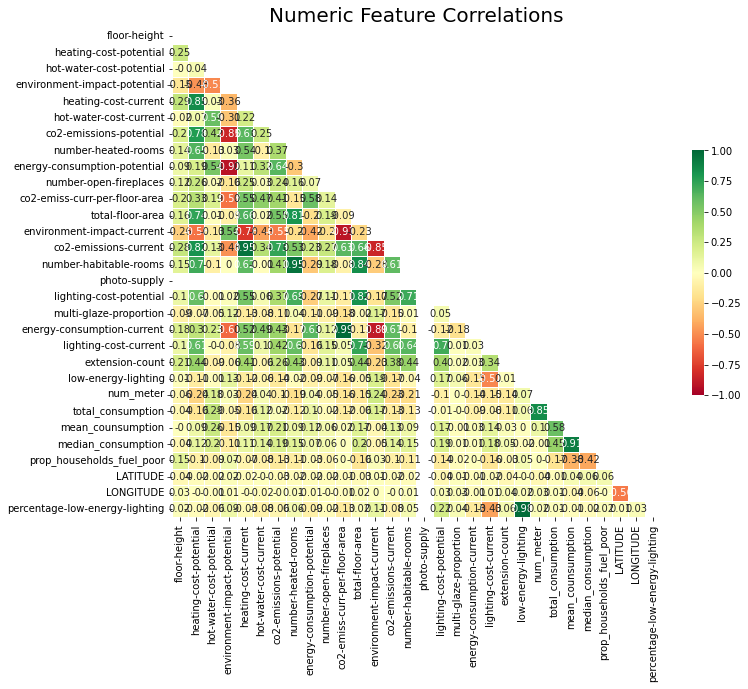

In [16]:
# plot correlations
corr_df = round(corr_df,2)
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Numeric Feature Correlations', fontsize=20)
sns.heatmap(corr_df, mask=mask, cmap='RdYlGn', vmin = -1, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

# K-Nearest-Neighbors

#### Running KNN to impute the missing data. Will most likely have to do this only on the training data for the final model. Doing proof of concept here to debug. Next iteration will include some catagorical variables to improve KNN imputation. Catagorical varaibles will ahve to be turned to numeric before input.

In [17]:
# initalize imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(df) # fitting the imputer

KNNImputer()

In [ ]:
trans_df = imputer.transform(df)

In [ ]:
# checking to see if it filled everything.
print('Missing: %d' % sum(isnan(df).flatten()))
print('Missing: %d' % sum(isnan(trans_df).flatten()))